In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
data = pd.read_csv('training_set_VU_DM_2014.csv')
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [31]:
sampled = data.groupby(by='srch_id', as_index=False)
sampled.head()
#data.info()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
28,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
29,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
30,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
31,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
32,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [63]:
selected_names = np.random.choice(data.srch_id.unique(),5000,replace = False)
#grouped = data[data.srch_id.isin(selected_names)].groupby('srch_id')
grouped = data[data.srch_id.isin(selected_names)]
grouped.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
1714,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,5507,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1715,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,6595,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1716,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,27980,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,107.42,1
1717,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,29029,2,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1718,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,31430,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [64]:
#grouped.apply(pd.DataFrame.info)
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123943 entries, 1714 to 4957668
Data columns (total 54 columns):
srch_id                        123943 non-null int64
date_time                      123943 non-null object
site_id                        123943 non-null int64
visitor_location_country_id    123943 non-null int64
visitor_hist_starrating        6858 non-null float64
visitor_hist_adr_usd           6887 non-null float64
prop_country_id                123943 non-null int64
prop_id                        123943 non-null int64
prop_starrating                123943 non-null int64
prop_review_score              123748 non-null float64
prop_brand_bool                123943 non-null int64
prop_location_score1           123943 non-null float64
prop_location_score2           97418 non-null float64
prop_log_historical_price      123943 non-null float64
position                       123943 non-null int64
price_usd                      123943 non-null float64
promotion_flag             

In [65]:
grouped.to_csv('5000users')

In [2]:
data = pd.read_csv('5000users')
data.head()

,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1714,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,5507,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1715,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,6595,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,1716,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,27980,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,107.42,1
3,1717,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,29029,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,1718,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,31430,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [55]:
data.drop(data['Unnamed: 0'])
data.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.plot(logy=True)
plt.show()

ValueError: labels [ 123943  123944  123945 ... 4957666 4957667 4957668] not contained in axis

In [3]:
data.describe()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,1.239430e+05,123943.000000,123943.000000,123943.000000,6858.000000,6887.000000,123943.000000,123943.000000,123943.000000,123748.000000,...,2339.000000,7885.000000,8930.000000,3394.000000,48272.000000,50087.000000,15676.000000,123943.000000,3436.000000,123943.000000
mean,2.459634e+06,165057.019065,9.903173,175.622439,3.303481,169.835789,174.196679,70183.854828,3.177517,3.791673,...,16.628046,0.150666,0.090258,19.433117,-0.060408,0.009743,49.458216,0.044722,381.193638,0.027722
std,1.420634e+06,95393.074577,7.658924,65.632313,0.714508,90.834018,68.561615,40676.122305,1.040220,1.034100,...,25.690369,0.563903,0.319811,41.383684,0.472084,0.205311,1854.770230,0.206694,493.387030,0.164177
min,1.714000e+03,115.000000,1.000000,2.000000,1.750000,38.370000,2.000000,1.000000,0.000000,0.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,14.470000,0.000000
25%,1.250832e+06,83714.000000,5.000000,100.000000,2.810000,100.160000,100.000000,35044.000000,3.000000,3.500000,...,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,123.955000,0.000000
50%,2.446235e+06,164285.000000,5.000000,219.000000,3.360000,149.870000,219.000000,69848.000000,3.000000,4.000000,...,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000,216.695000,0.000000
75%,3.692658e+06,247930.000000,14.000000,219.000000,3.860000,215.810000,219.000000,105215.000000,4.000000,4.500000,...,18.000000,0.000000,0.000000,20.000000,0.000000,0.000000,17.000000,0.000000,440.707500,0.000000
max,4.957668e+06,332730.000000,34.000000,229.000000,5.000000,458.790000,230.000000,140816.000000,5.000000,5.000000,...,614.000000,1.000000,1.000000,834.000000,1.000000,1.000000,119506.000000,1.000000,6209.470000,1.000000


In [6]:
#sample = data.sample(n=10000)

In [7]:
#sample.head()

In [8]:
#sample.describe()

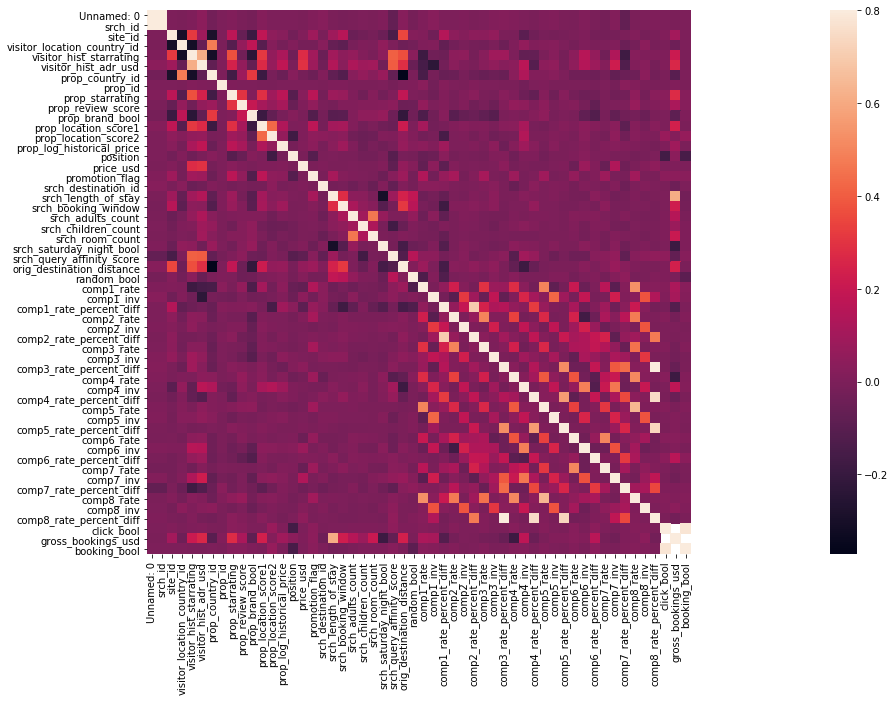

In [5]:
#add prog and money
corrmat = data.corr()
f, ax = plt.subplots(figsize=(50, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [6]:
history_data = data.loc[data['visitor_hist_adr_usd'].notnull()]
history_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252988 entries, 550 to 4958241
Data columns (total 54 columns):
srch_id                        252988 non-null int64
date_time                      252988 non-null object
site_id                        252988 non-null int64
visitor_location_country_id    252988 non-null int64
visitor_hist_starrating        251833 non-null float64
visitor_hist_adr_usd           252988 non-null float64
prop_country_id                252988 non-null int64
prop_id                        252988 non-null int64
prop_starrating                252988 non-null int64
prop_review_score              252624 non-null float64
prop_brand_bool                252988 non-null int64
prop_location_score1           252988 non-null float64
prop_location_score2           194740 non-null float64
prop_log_historical_price      252988 non-null float64
position                       252988 non-null int64
price_usd                      252988 non-null float64
promotion_flag         

In [8]:
len(history_data.srch_id.value_counts())

10546

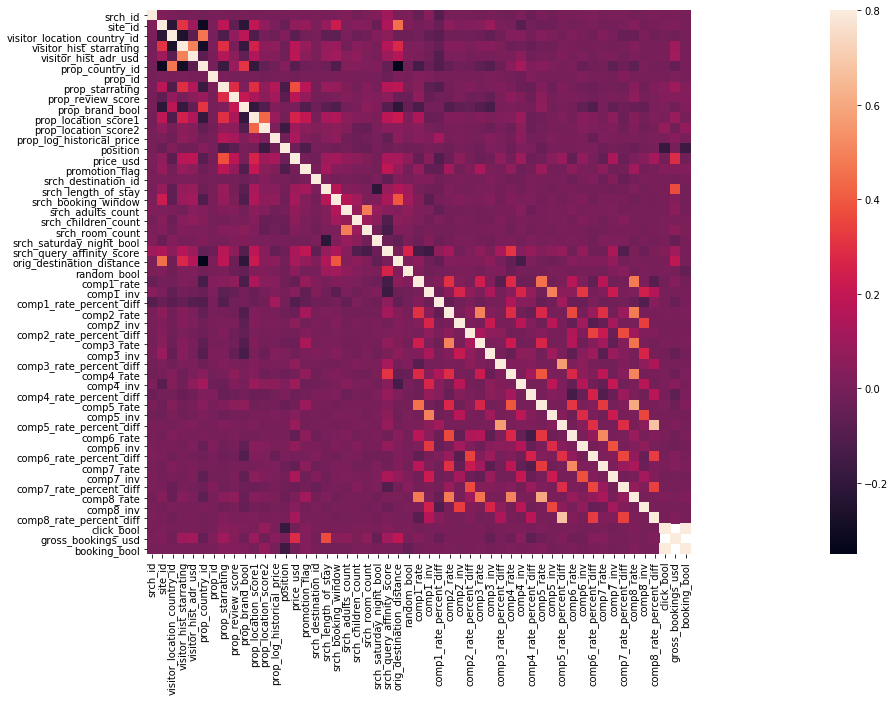

In [11]:
#add prog and money
corrmat = history_data.corr()
f, ax = plt.subplots(figsize=(50, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
#sample.to_csv('sampled')

clicked_data = history_data[history_data['click_bool'] == 1]
clicked_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11202 entries, 568 to 4958241
Data columns (total 54 columns):
srch_id                        11202 non-null int64
date_time                      11202 non-null object
site_id                        11202 non-null int64
visitor_location_country_id    11202 non-null int64
visitor_hist_starrating        11140 non-null float64
visitor_hist_adr_usd           11202 non-null float64
prop_country_id                11202 non-null int64
prop_id                        11202 non-null int64
prop_starrating                11202 non-null int64
prop_review_score              11193 non-null float64
prop_brand_bool                11202 non-null int64
prop_location_score1           11202 non-null float64
prop_location_score2           10056 non-null float64
prop_log_historical_price      11202 non-null float64
position                       11202 non-null int64
price_usd                      11202 non-null float64
promotion_flag                 11202 non

In [13]:
booked_data = history_data[history_data['booking_bool'] == 1]
booked_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 568 to 4958241
Data columns (total 54 columns):
srch_id                        9134 non-null int64
date_time                      9134 non-null object
site_id                        9134 non-null int64
visitor_location_country_id    9134 non-null int64
visitor_hist_starrating        9087 non-null float64
visitor_hist_adr_usd           9134 non-null float64
prop_country_id                9134 non-null int64
prop_id                        9134 non-null int64
prop_starrating                9134 non-null int64
prop_review_score              9127 non-null float64
prop_brand_bool                9134 non-null int64
prop_location_score1           9134 non-null float64
prop_location_score2           8218 non-null float64
prop_log_historical_price      9134 non-null float64
position                       9134 non-null int64
price_usd                      9134 non-null float64
promotion_flag                 9134 non-null int64
srch_d

In [44]:
#sample.to_csv('sampled')

labels = range(1, 40)
#a = history_data.groupby('srch_id').apply(lambda x:  x['price_usd'].mean())
#a = clicked_data.groupby('srch_id').apply(lambda x:  x['price_usd'].mean())
a = booked_data.groupby('srch_id').apply(lambda x:  x['price_usd'].mean())


a.head()

srch_id
47     153.50
49     115.24
80     127.00
87      96.65
113    170.25
dtype: float64

In [43]:
#b = history_data.groupby('srch_id').apply(lambda x : x['visitor_hist_adr_usd'].mean())
#b = clicked_data.groupby('srch_id').apply(lambda x : x['visitor_hist_adr_usd'].mean())

b = booked_data.groupby('srch_id').apply(lambda x : x['visitor_hist_adr_usd'].mean())
len(b)

9134

In [45]:
delta = abs(a - b)
#combined['delta'] = combined.apply(lambda x : x['hist'].astype(float) - x['mean'].astype(float))
len(delta)

9134

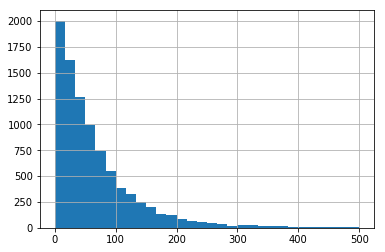

In [46]:
#booked price delta
delta.std()
delta.hist(bins=30, range=[0, 500])

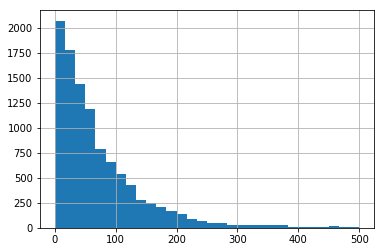

In [37]:
#overall price delta
delta.std()
delta.hist(bins=30, range=[0, 500])

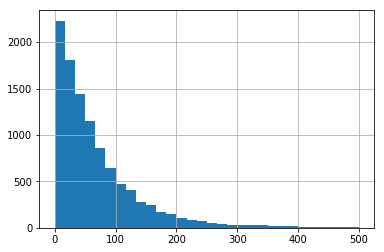

In [41]:
#clicked price delta
delta.std()
delta.hist(bins=30, range=[0, 500])

In [29]:
print(historical)

In [34]:
searches = data.srch_id.value_counts()
len(searches)

2000

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49306 entries, 0 to 49305
Data columns (total 55 columns):
Unnamed: 0                     49306 non-null int64
srch_id                        49306 non-null int64
date_time                      49306 non-null object
site_id                        49306 non-null int64
visitor_location_country_id    49306 non-null int64
visitor_hist_starrating        2199 non-null float64
visitor_hist_adr_usd           2199 non-null float64
prop_country_id                49306 non-null int64
prop_id                        49306 non-null int64
prop_starrating                49306 non-null int64
prop_review_score              49236 non-null float64
prop_brand_bool                49306 non-null int64
prop_location_score1           49306 non-null float64
prop_location_score2           37966 non-null float64
prop_log_historical_price      49306 non-null float64
position                       49306 non-null int64
price_usd                      49306 non-null fl

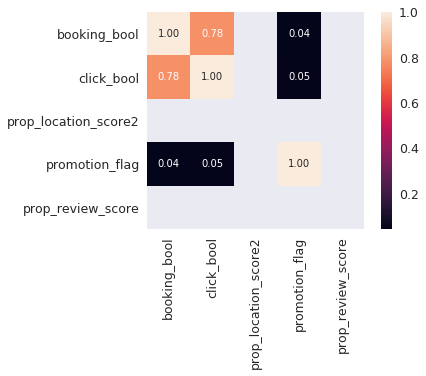

In [9]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'booking_bool')['booking_bool'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

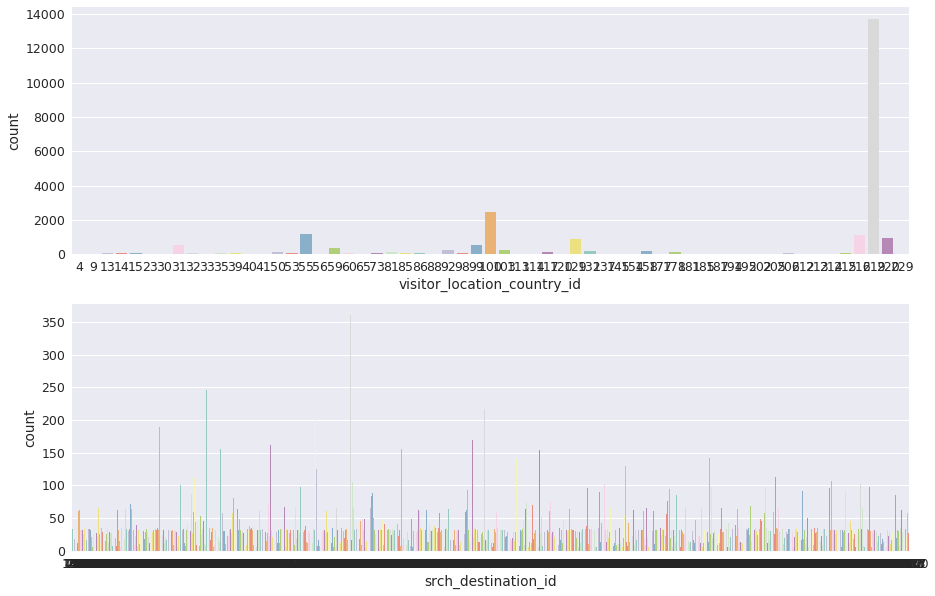

In [10]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = data[data["booking_bool"] == 1]

# What are the most countries the customer travel from?
sns.countplot('visitor_location_country_id',data=data.sort_values(by=['visitor_location_country_id']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('srch_destination_id',data=data.sort_values(by=['srch_destination_id']),ax=axis2,palette="Set3")

# Combine both plots
# fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# sns.distplot(bookings_df["hotel_country"], kde=False, rug=False, bins=25, ax=axis1)
# sns.distplot(bookings_df["user_location_country"], kde=False, rug=False, bins=25, ax=axis1)

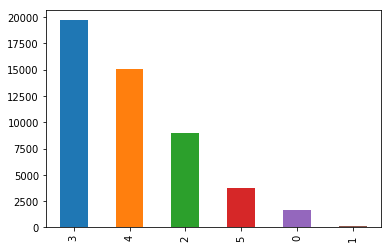

In [36]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
data.prop_starrating.value_counts().plot.bar();

In [10]:
import matplotlib.pyplot as plt
count_book = data.groupby(['booking_bool'], sort=False).size().reset_index(name='Count')
count_book
 


,booking_bool,Count
0,0,120507
1,1,3436


In [11]:
import matplotlib.pyplot as plt
count_brand = data.groupby(['prop_brand_bool'], sort=False).size().reset_index(name='Count')
count_brand
 

,prop_brand_bool,Count
0,1,78580
1,0,45363


In [12]:
import matplotlib.pyplot as plt
count_click = data.groupby(['click_bool'], sort=False).size().reset_index(name='Count')
count_click
 

,click_bool,Count
0,0,118400
1,1,5543


In [39]:
filteredpromo = data.loc[(data['promotion_flag'] == 1)]
data.count()

Unnamed: 0                     123943
srch_id                        123943
date_time                      123943
site_id                        123943
visitor_location_country_id    123943
visitor_hist_starrating          6858
visitor_hist_adr_usd             6887
prop_country_id                123943
prop_id                        123943
prop_starrating                123943
prop_review_score              123748
prop_brand_bool                123943
prop_location_score1           123943
prop_location_score2            97418
prop_log_historical_price      123943
position                       123943
price_usd                      123943
promotion_flag                 123943
srch_destination_id            123943
srch_length_of_stay            123943
srch_booking_window            123943
srch_adults_count              123943
srch_children_count            123943
srch_room_count                123943
srch_saturday_night_bool       123943
srch_query_affinity_score        7884
orig_destina

In [40]:
filtered3 = data.loc[(data['booking_bool'] == 1) & (data['promotion_flag'] == 1)]
filtered3.count()

Unnamed: 0                     1026
srch_id                        1026
date_time                      1026
site_id                        1026
visitor_location_country_id    1026
visitor_hist_starrating          69
visitor_hist_adr_usd             69
prop_country_id                1026
prop_id                        1026
prop_starrating                1026
prop_review_score              1026
prop_brand_bool                1026
prop_location_score1           1026
prop_location_score2            952
prop_log_historical_price      1026
position                       1026
price_usd                      1026
promotion_flag                 1026
srch_destination_id            1026
srch_length_of_stay            1026
srch_booking_window            1026
srch_adults_count              1026
srch_children_count            1026
srch_room_count                1026
srch_saturday_night_bool       1026
srch_query_affinity_score        77
orig_destination_distance       696
random_bool                 

In [44]:
filteredclickpromo = data.loc[(data['click_bool'] == 1) & (data['promotion_flag'] == 1)]
filteredclickpromo.count()

Unnamed: 0                     1566
srch_id                        1566
date_time                      1566
site_id                        1566
visitor_location_country_id    1566
visitor_hist_starrating          82
visitor_hist_adr_usd             82
prop_country_id                1566
prop_id                        1566
prop_starrating                1566
prop_review_score              1566
prop_brand_bool                1566
prop_location_score1           1566
prop_location_score2           1443
prop_log_historical_price      1566
position                       1566
price_usd                      1566
promotion_flag                 1566
srch_destination_id            1566
srch_length_of_stay            1566
srch_booking_window            1566
srch_adults_count              1566
srch_children_count            1566
srch_room_count                1566
srch_saturday_night_bool       1566
srch_query_affinity_score        96
orig_destination_distance      1022
random_bool                 

In [14]:
filtered = data.loc[(data['booking_bool'] == 1) & data['prop_brand_bool'] == 1]
filtered.count()

Unnamed: 0                     2252
srch_id                        2252
date_time                      2252
site_id                        2252
visitor_location_country_id    2252
visitor_hist_starrating         158
visitor_hist_adr_usd            159
prop_country_id                2252
prop_id                        2252
prop_starrating                2252
prop_review_score              2252
prop_brand_bool                2252
prop_location_score1           2252
prop_location_score2           2050
prop_log_historical_price      2252
position                       2252
price_usd                      2252
promotion_flag                 2252
srch_destination_id            2252
srch_length_of_stay            2252
srch_booking_window            2252
srch_adults_count              2252
srch_children_count            2252
srch_room_count                2252
srch_saturday_night_bool       2252
srch_query_affinity_score       193
orig_destination_distance      1626
random_bool                 

In [15]:
filtered2 = data.loc[(data['click_bool'] == 1) & data['prop_brand_bool'] == 1]
filtered2.count()

Unnamed: 0                     3542
srch_id                        3542
date_time                      3542
site_id                        3542
visitor_location_country_id    3542
visitor_hist_starrating         197
visitor_hist_adr_usd            198
prop_country_id                3542
prop_id                        3542
prop_starrating                3542
prop_review_score              3542
prop_brand_bool                3542
prop_location_score1           3542
prop_location_score2           3184
prop_log_historical_price      3542
position                       3542
price_usd                      3542
promotion_flag                 3542
srch_destination_id            3542
srch_length_of_stay            3542
srch_booking_window            3542
srch_adults_count              3542
srch_children_count            3542
srch_room_count                3542
srch_saturday_night_bool       3542
srch_query_affinity_score       235
orig_destination_distance      2494
random_bool                 

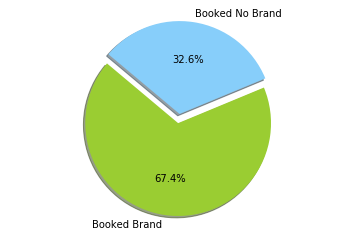

In [16]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Booked Brand', 'Booked No Brand'
sizes = [929, 450]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

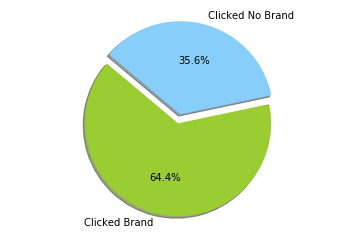

In [48]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Clicked Brand', ' Clicked No Brand'
sizes = [1394, 770]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

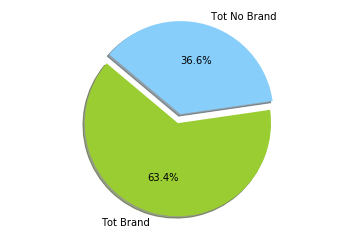

In [47]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Tot Brand', ' Tot No Brand'
sizes = [78580, 45363]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [18]:
tot_promo = data.loc[data['promotion_flag'] == 1]
tot_promo.count()

Unnamed: 0                     26552
srch_id                        26552
date_time                      26552
site_id                        26552
visitor_location_country_id    26552
visitor_hist_starrating         1387
visitor_hist_adr_usd            1389
prop_country_id                26552
prop_id                        26552
prop_starrating                26552
prop_review_score              26530
prop_brand_bool                26552
prop_location_score1           26552
prop_location_score2           23044
prop_log_historical_price      26552
position                       26552
price_usd                      26552
promotion_flag                 26552
srch_destination_id            26552
srch_length_of_stay            26552
srch_booking_window            26552
srch_adults_count              26552
srch_children_count            26552
srch_room_count                26552
srch_saturday_night_bool       26552
srch_query_affinity_score       1572
orig_destination_distance      17362
r

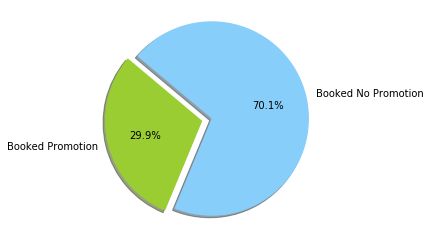

In [42]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Booked Promotion', 'Booked No Promotion'
sizes = [1026, 2410]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

 
plt.axis('equal')
plt.show()

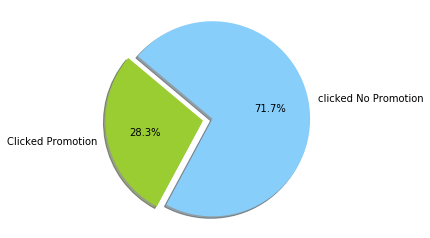

In [45]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Clicked Promotion', 'clicked No Promotion'
sizes = [1566, 3977]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

 
plt.axis('equal')
plt.show()

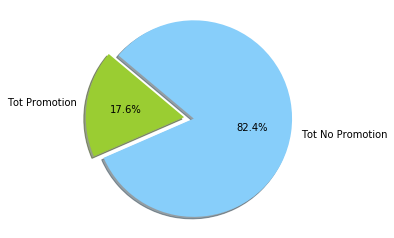

In [43]:
# Data to plot
labels = 'Tot Promotion', 'Tot No Promotion'
sizes = [26552, 123943]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

 
plt.axis('equal')
plt.show()

In [20]:
grouped = data.groupby('srch_id')
grouped.head()

,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1714,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,5507,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1715,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,6595,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,1716,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,27980,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,107.42,1
3,1717,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,29029,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,1718,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,31430,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
15,3093,196,2013-02-05 17:32:52,7,100,NaN,NaN,100,14785,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
16,3094,196,2013-02-05 17:32:52,7,100,NaN,NaN,100,17471,2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
17,3095,196,2013-02-05 17:32:52,7,100,NaN,NaN,100,26092,3,...,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,0,NaN,0
18,3096,196,2013-02-05 17:32:52,7,100,NaN,NaN,100,44849,4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
19,3097,196,2013-02-05 17:32:52,7,100,NaN,NaN,100,76207,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [21]:
posdata = data.groupby('position')
print(posdata)

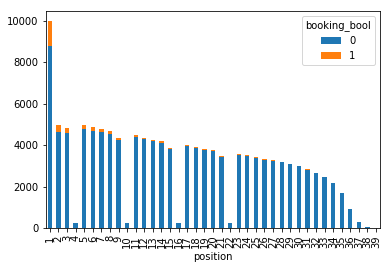

In [22]:
labels = range(1, 40)
data.groupby(['booking_bool', pd.cut(data['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

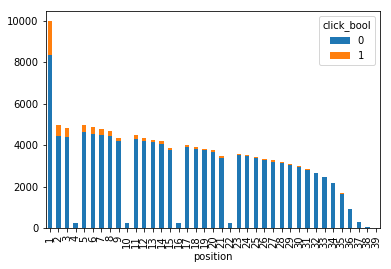

In [33]:
labels = range(1, 40)
data.groupby(['click_bool', pd.cut(data['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True
                )

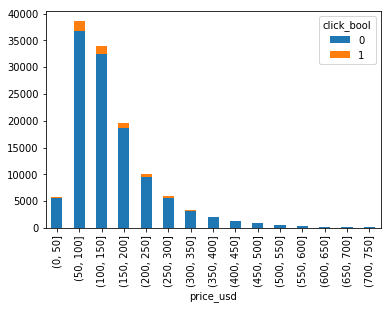

In [24]:
labels = range(1, 40)
data.groupby(['click_bool', pd.cut(data['price_usd'], np.arange(0, 800, 50))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)
    
    

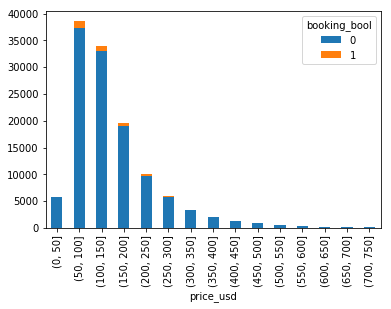

In [57]:
labels = range(1, 40)
data.groupby(['booking_bool',  pd.cut(data['price_usd'], np.arange(0, 800, 50))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [12]:
data['price_range'] = (data['price_usd']+(100 - data['price_usd']%100))/100
data['price_range']

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
5         2.0
6         1.0
7         1.0
8         1.0
9         2.0
10        2.0
11        2.0
12        1.0
13        1.0
14        1.0
15        1.0
16        2.0
17        3.0
18        3.0
19        2.0
20        2.0
21        2.0
22        2.0
23        2.0
24        2.0
25        3.0
26        3.0
27        2.0
28        3.0
29        3.0
         ... 
123913    3.0
123914    4.0
123915    4.0
123916    2.0
123917    3.0
123918    2.0
123919    3.0
123920    3.0
123921    3.0
123922    2.0
123923    2.0
123924    2.0
123925    3.0
123926    3.0
123927    5.0
123928    2.0
123929    4.0
123930    3.0
123931    2.0
123932    2.0
123933    5.0
123934    3.0
123935    3.0
123936    2.0
123937    2.0
123938    2.0
123939    4.0
123940    2.0
123941    5.0
123942    3.0
Name: price_range, Length: 123943, dtype: float64

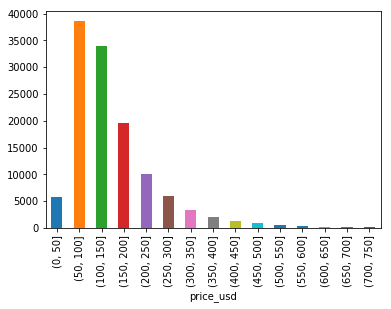

In [46]:
labels = range(1, 40)
data.groupby([pd.cut(data['price_usd'], np.arange(0, 800, 50))])\
       .size()\
       .plot.bar(stacked=True)

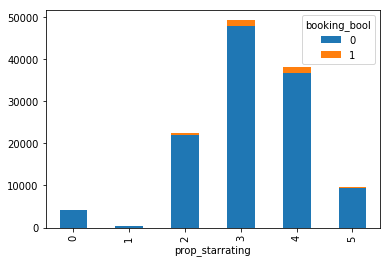

In [26]:
labels = range(0, 6)
data.groupby(['booking_bool', pd.cut(data['prop_starrating'], 6,labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [ ]:

data.groupby(['price_range', pd.cut(data['position'])])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

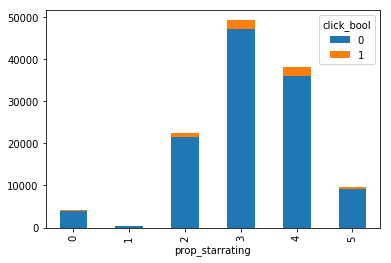

In [27]:
labels = range(0, 6)
data.groupby(['click_bool', pd.cut(data['prop_starrating'], 6,labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123943 entries, 0 to 123942
Data columns (total 55 columns):
Unnamed: 0                     123943 non-null int64
srch_id                        123943 non-null int64
date_time                      123943 non-null object
site_id                        123943 non-null int64
visitor_location_country_id    123943 non-null int64
visitor_hist_starrating        6858 non-null float64
visitor_hist_adr_usd           6887 non-null float64
prop_country_id                123943 non-null int64
prop_id                        123943 non-null int64
prop_starrating                123943 non-null int64
prop_review_score              123748 non-null float64
prop_brand_bool                123943 non-null int64
prop_location_score1           123943 non-null float64
prop_location_score2           97418 non-null float64
prop_log_historical_price      123943 non-null float64
position                       123943 non-null int64
price_usd                      12

In [29]:
rand_results = data[data.random_bool == 1]
rand_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37502 entries, 55 to 123942
Data columns (total 55 columns):
Unnamed: 0                     37502 non-null int64
srch_id                        37502 non-null int64
date_time                      37502 non-null object
site_id                        37502 non-null int64
visitor_location_country_id    37502 non-null int64
visitor_hist_starrating        1112 non-null float64
visitor_hist_adr_usd           1112 non-null float64
prop_country_id                37502 non-null int64
prop_id                        37502 non-null int64
prop_starrating                37502 non-null int64
prop_review_score              37437 non-null float64
prop_brand_bool                37502 non-null int64
prop_location_score1           37502 non-null float64
prop_location_score2           28829 non-null float64
prop_log_historical_price      37502 non-null float64
position                       37502 non-null int64
price_usd                      37502 non-null 

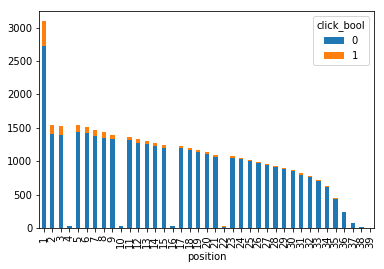

In [30]:
labels = range(1, 40)
rand_results.groupby(['click_bool', pd.cut(rand_results['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [15]:
data_no_outliers = data[data['price_range'] < 6]


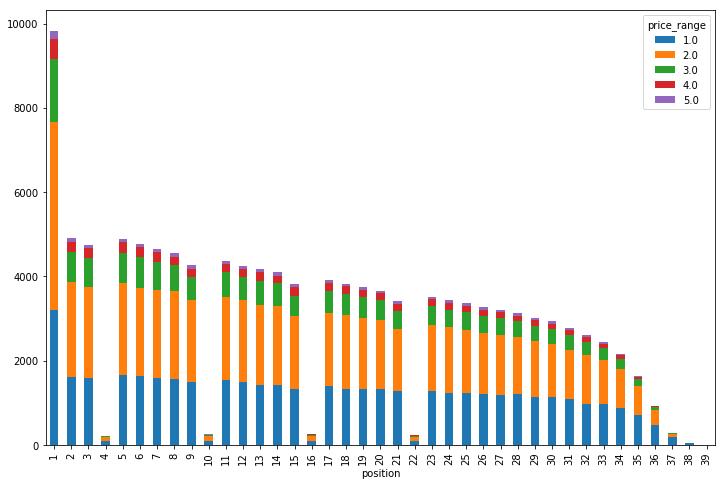

In [17]:
labels = range(1, 40)
data_no_outliers.groupby(['price_range', pd.cut(data_no_outliers['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, figsize=(12,8))

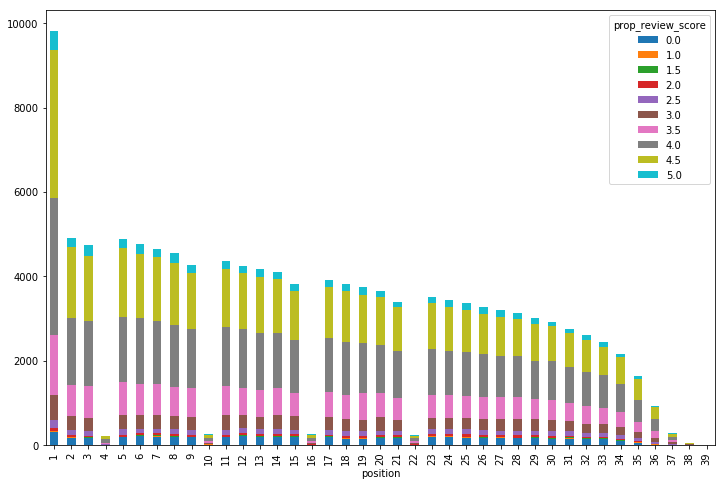

In [18]:
labels = range(1, 40)
data_no_outliers.groupby(['prop_review_score', pd.cut(data_no_outliers['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, figsize=(12,8))

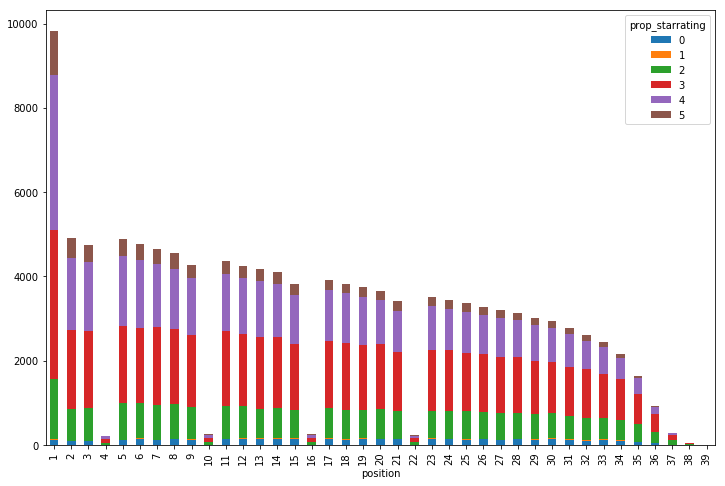

In [19]:
labels = range(1, 40)
data.groupby(['prop_starrating', pd.cut(data['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, figsize=(12,8))

In [29]:
data['discrete_score'] = data['prop_location_score1'].round()
data['discrete_score']

0         3.0
1         3.0
2         3.0
3         1.0
4         1.0
5         1.0
6         1.0
7         3.0
8         3.0
9         2.0
10        1.0
11        2.0
12        0.0
13        3.0
14        0.0
15        1.0
16        1.0
17        2.0
18        2.0
19        1.0
20        1.0
21        2.0
22        1.0
23        1.0
24        4.0
25        4.0
26        3.0
27        1.0
28        0.0
29        4.0
         ... 
123913    4.0
123914    4.0
123915    0.0
123916    6.0
123917    6.0
123918    5.0
123919    6.0
123920    4.0
123921    6.0
123922    1.0
123923    2.0
123924    4.0
123925    6.0
123926    5.0
123927    6.0
123928    5.0
123929    5.0
123930    5.0
123931    5.0
123932    1.0
123933    5.0
123934    6.0
123935    6.0
123936    6.0
123937    6.0
123938    4.0
123939    6.0
123940    6.0
123941    6.0
123942    6.0
Name: discrete_score, Length: 123943, dtype: float64

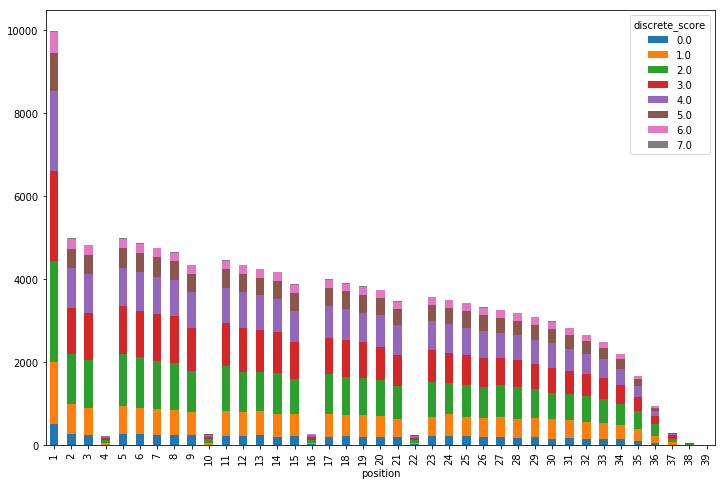

In [31]:
labels = range(1, 40)
data.groupby(['discrete_score', pd.cut(data['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, figsize=(12,8))

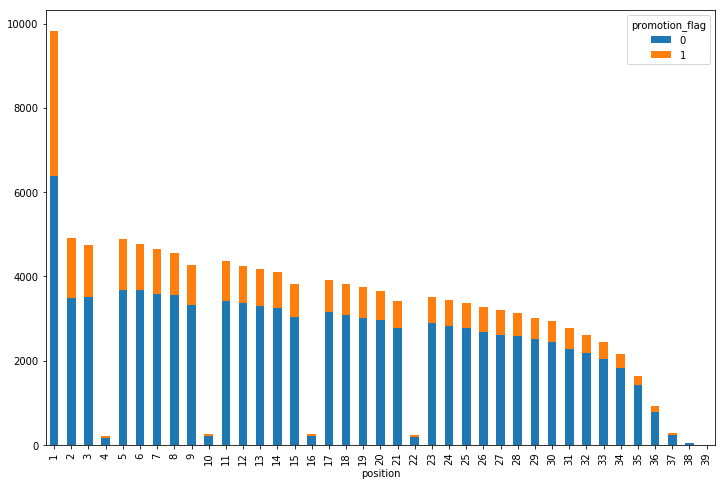

In [21]:
labels = range(1, 40)
data.groupby(['promotion_flag', pd.cut(data['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True, figsize=(12,8))

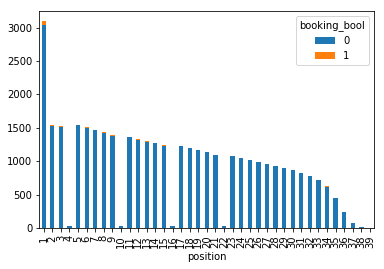

In [31]:
labels = range(1, 40)
rand_results.groupby(['booking_bool', pd.cut(rand_results['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [58]:
avgresults = data.groupby('srch_id').size().mean()
avgresults

24.7886